# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

sns.set()

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/Users/jitendra_agarwal/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


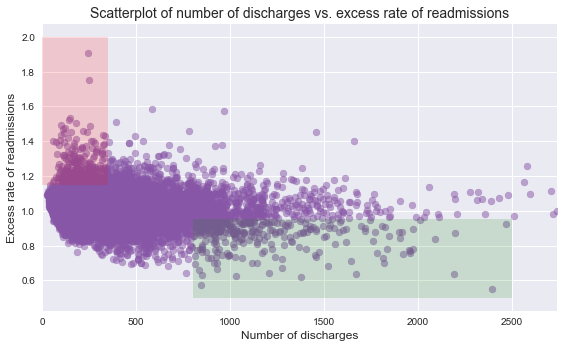

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y, alpha=0.5, color='#8856a7')

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

###### 1. Do you agree with the above analysis and recommendations? Why or why not?


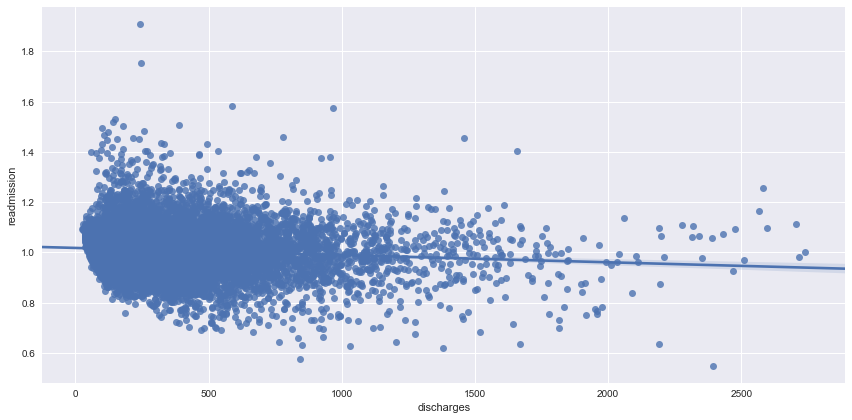

In [5]:
# lets draw a lmplot to see the distribution.
from scipy import stats
import numpy as np

xx = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
yy = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

data = pd.DataFrame({'discharges': xx, 'readmission': yy})
sns.lmplot(x='discharges', y='readmission', data=data, aspect=2, x_jitter=.1, size=6)



    - Overall, rate of readmissions is trending down with increasing number of discharges
    - With lower number of discharges, there is a greater incidence of excess rate of readmissions (area in red)
    - With higher number of discharges, there is a greater incidence of lower rates of readmissions (area in green)
    
Based on the Preliminary Report above i agree with the overall initial observations. i have used above lmplot for this with regression line to validate the statement.


###### 2. Statistics

Lets Analyze the statstics claims:-

In [6]:
# Lets first clean the data to exclude null excess readmission ratios

clean_hospital_read_df = clean_hospital_read_df[np.logical_not(clean_hospital_read_df['Excess Readmission Ratio'].isnull())]
print('Number of samples: {}'.format(len(clean_hospital_read_df)))
print('Mean excess readmission ratio: {:.4f}'.format(clean_hospital_read_df['Excess Readmission Ratio'].mean()))

df_100 = pd.DataFrame(clean_hospital_read_df.loc[clean_hospital_read_df['Number of Discharges'] < 100])
df_1000 = pd.DataFrame(clean_hospital_read_df.loc[clean_hospital_read_df['Number of Discharges'] > 1000])

mean_readmisratio_100 = np.around(np.mean(df_100['Excess Readmission Ratio']), 3)
mean_readmisratio_1000 = np.around(np.mean(df_1000['Excess Readmission Ratio']), 3)

mean_readmis_100 = np.around((len(df_100[(df_100['Excess Readmission Ratio'] > 1 )])/len(df_100))*100, 2)
mean_readmis_1000 = np.around((len(df_1000[(df_1000['Excess Readmission Ratio'] > 1)])/len(df_1000))*100, 2)

print('In hospitals/facilities with number of discharges < 100, mean excess readmission rate is ',mean_readmisratio_100 ,' and ', mean_readmis_100, ' % have excess readmission rate greater than 1')
print('In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is ',mean_readmisratio_1000 ,' and ', mean_readmis_1000, ' % have excess readmission rate greater than 1')


Number of samples: 11497
Mean excess readmission ratio: 1.0075
In hospitals/facilities with number of discharges < 100, mean excess readmission rate is  1.023  and  63.22  % have excess readmission rate greater than 1
In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is  0.978  and  44.49  % have excess readmission rate greater than 1


In [7]:
#lets check standard deviation and other stats for both data set of small and Big Hospital

print(df_100['Excess Readmission Ratio'].describe())
print(df_1000['Excess Readmission Ratio'].describe())

count    1188.000000
mean        1.022618
std         0.057979
min         0.893500
25%         0.984900
50%         1.017750
75%         1.052925
max         1.495300
Name: Excess Readmission Ratio, dtype: float64
count    463.000000
mean       0.978335
std        0.120007
min        0.549500
25%        0.907900
50%        0.986400
75%        1.057100
max        1.454300
Name: Excess Readmission Ratio, dtype: float64


- Based on the cross examination Its pretty clear that the given stats are Correct. and base don the Analysis the conclusion and recommendation are also appearing as valid and reasonable.

### B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

- Setup an appropriate hypothesis test.

- Compute and report the observed significance value (or p-value).

- Report statistical significance for  αα = .01.

- Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?

- Look at the scatterplot above.

- What are the advantages and disadvantages of using this plot to convey information?

- Construct another plot that conveys the same information in a more direct manner.

Is the mean readmission rate for Small Hospital (samples with less than 100 discharges) truly greater than that of Big Hospitals( samples with greater than 1000 discharges) ?

    H0: ML_100 - ML_1000 > 0

    H1: ML_100 - ML_1000 <= 0
    
   For this hypothesis test we will divide data in 2 groups. and perfrm t test on those to evaluate p and t stats values. Lets first check if there is a normal distribution.
   

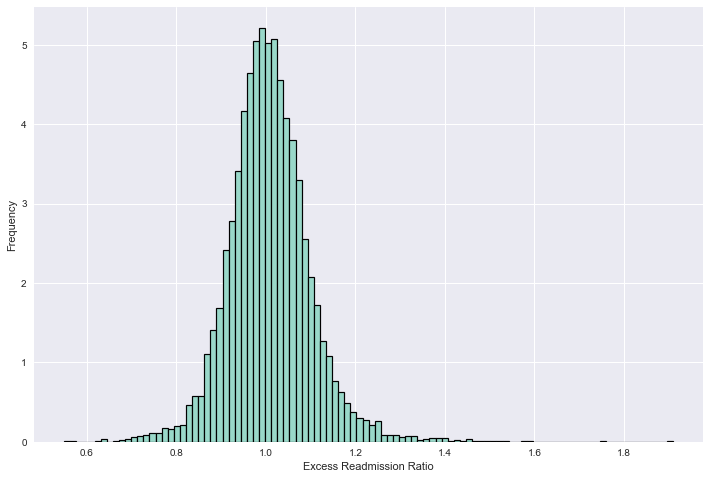

In [8]:
# Is the Excess Readmission Ratio normally distributed?

df_sorted = sorted(clean_hospital_read_df['Excess Readmission Ratio'])
plt.figure(figsize=(12,8))
plt.hist(df_sorted, normed=True, color='#99d8c9', edgecolor='black', linewidth=1.2, bins=100) 
_ = plt.xlabel('Excess Readmission Ratio')
_ = plt.ylabel('Frequency')
plt.show()


In [9]:
# we already have separated the data set into two groups, based on number of discharges df_100 and df_1000
# Now use t-test to evaluate the hypothesis

T, p = stats.ttest_ind(df_100['Excess Readmission Ratio'].dropna(), 
                       df_1000['Excess Readmission Ratio'].dropna(), equal_var=False)

# divide the p-value by 2, since we would like a one-sided test in this case

p = p / 2
print ('Test Statistic (T):', T)
print ('p-value:', p)

Test Statistic (T): 7.6017424185
p-value: 6.37621772557e-14


- This is a normally distributed data aset and also independent as each hospital function isolated to other. We get a positive t-statistics for Null hypothesis and the p-value $= 6.38 \times 10^{-14}$. 

- Since the calculated p-value is far smaller, we may reject the null hypothesis and claim that the group of small hospitals has larger mean excess readmission ratio. Therefore, we should probably look into other variables or columns that might influence excess readmissions.

- P value is less then the statistical significance for αα = .01 so this negative relationship is indeed statistically significant and we can affirmly reject the null hypothesis.

In [10]:
print("For every discharge in Small hospital, Excess Readmission Ratio is : ", sum(df_100['Excess Readmission Ratio'].dropna())/sum(df_100['Number of Discharges'].dropna()))
print("For every discharge in Big hospital, Excess Readmission Ratio is : ",sum(df_1000['Excess Readmission Ratio'].dropna())/sum(df_1000['Number of Discharges'].dropna()))

lower_100, upper_100 = stats.t.interval(0.99, len(df_100['Excess Readmission Ratio'])-1, 
                                         loc=np.mean(df_100['Excess Readmission Ratio']), 
                                         scale=stats.sem(df_100['Excess Readmission Ratio']))

lower_1000, upper_1000 = stats.t.interval(0.99, len(df_1000['Excess Readmission Ratio'])-1, 
                                            loc=np.mean(df_1000['Excess Readmission Ratio']), 
                                            scale=stats.sem(df_1000['Excess Readmission Ratio']))

print('The 99% confidence interval for Small Hospitals is ({:.2f}, {:.2f}).'.format(lower_100,upper_100))
print('The 99% confidence interval for Big Hospitals is ({:.2f}, {:.2f}).'.format(lower_1000,upper_1000))

For every discharge in Small hospital, Excess Readmission Ratio is :  0.013686523816
For every discharge in Big hospital, Excess Readmission Ratio is :  0.000707182210898
The 99% confidence interval for Small Hospitals is (1.02, 1.03).
The 99% confidence interval for Big Hospitals is (0.96, 0.99).


- At 99% confidence level both group of hospital (small and big) speraltly has a Excess Readmission Ratio range of not much different. and there is no practical difference between ratio of small and big hospital. this differnce is statistically insignificant.


###### Based on the scatterplot above:

What are the advantages and disadvantages of using this plot to convey information?


Advantages:

- Simple and asy to read for amount of information.
- Provides highlighted green and red areas of focus where the problem lies.
- Have ignored the huge outlier and taking odd slices of the data between [81:-3] so that the analysis remain meanigful.


Disadvantages:

- Overplotting. Hiding minor details and Conveys too much information to draw simple conclusions.
- Green and red areas of focus are not the same as the statistical analyses used and are misleading.


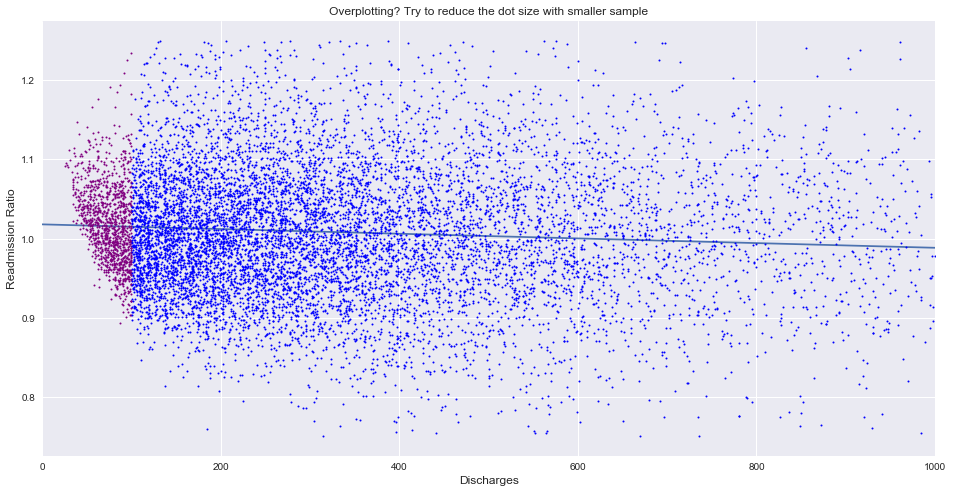

In [11]:
#Resolving Outliner by picking smaller Dot zise, focusing on high population sample

from scipy.stats import linregress

new_data_100 = data[(data['discharges'] <= 100) & (data['readmission'] < 1.25) & (data['readmission'] > .75)]
new_data_1000 = data[(data['discharges'] > 100) & (data['discharges'] <= 1000) & (data['readmission'] < 1.25) & (data['readmission'] > .75)]

slope, intercept = np.polyfit(clean_hospital_read_df['Number of Discharges'], clean_hospital_read_df['Excess Readmission Ratio'], 1)

fitx = [0, 1000]
fity = [intercept, intercept + slope*intercept*1000]

fig, ax = plt.subplots(figsize=(16,8))
ax.plot(fitx, fity)
ax.set_xlim(0,1000)
ax.plot('discharges', 'readmission', data=new_data_100, linestyle='', marker='o', markersize=2, color="purple" )
ax.plot('discharges', 'readmission', data=new_data_1000, linestyle='', marker='o', markersize=2, color="blue" )
ax.set_xlabel('Discharges', fontsize=12)
ax.set_ylabel('Readmission Ratio', fontsize=12)
ax.set_title('Overplotting? Try to reduce the dot size with smaller sample')

plt.show()



##### ** It is also worth mentioning that there are 5282 out of 16860 Hospital without details of no of Discharges. so  31% of data samplw was ignored for thsi analysis.

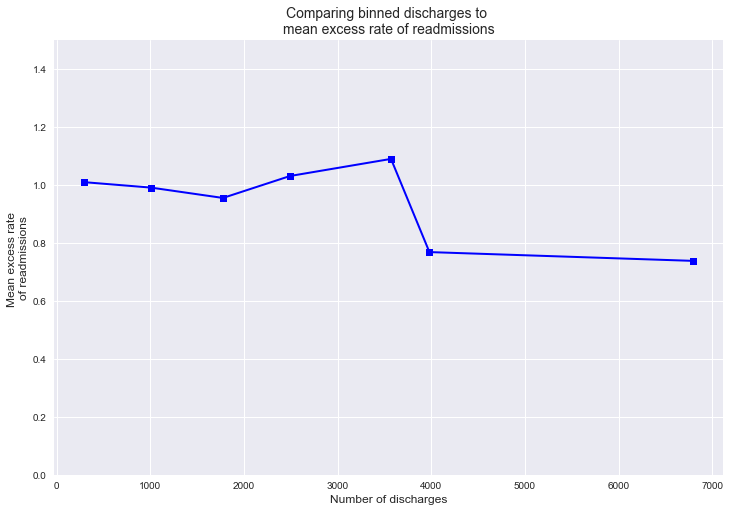

In [12]:
# Bin the data frame by 'Number of Discharges' with 10 bins
bins = np.linspace(clean_hospital_read_df['Number of Discharges'].min(), 
                   clean_hospital_read_df['Number of Discharges'].max(), 10)

groups = clean_hospital_read_df.groupby(np.digitize(clean_hospital_read_df['Number of Discharges'], bins))

#Plot the binned data by mean excess rate of readmission per bin
plt.figure(figsize=(12,8))
plt.plot(groups.aggregate(lambda x: np.mean(x[x > 0.5]))['Number of Discharges'], 
         list(groups.aggregate(lambda x: np.mean(x[x > 0.5]))['Excess Readmission Ratio']),
         color='b', lw=2, marker='s')
plt.xlabel('Number of discharges', fontsize=12)
plt.ylabel('Mean excess rate \nof readmissions', fontsize=12)
plt.title('Comparing binned discharges to \nmean excess rate of readmissions', fontsize=14)
plt.ylim(0,1.5);

###### Conclusion:- 
It is worth to look at other parameter also which can result in the high ration of readmission such as Doctor's count, latest technology equipments, Doctor's latest skills level and Nursing staff efficeincy level etc. Often Big hospital tend to provide better result but it is not driven by on size of hospital.
